# Exercise - Landau Section 4.1.2: Computing a random sequence:

For scientific work we recommend using an industrial-strength random-number generator.
To see why, here we assess how bad a careless application of the power residue method
canbe.

1) Write a simple program to generate random numbers using the linear congruent
method (4.2).
2) For pedagogical purposes, try the unwise choice: (a,c,M,r1) = (57,1,256,10). Determine the *period*, that is, how many numbers are generated before the sequence repeats.
3) Take your pedagogical sequence of random numbers and look for correlations by observing clustering on a plot of successive pairs $(x_i,y_i) = (r_{2i}−1,r_{2i}),i= 1,2,…$. (Do not connect the points with lines.) You may “see” correlations (Figure4.1), which means that you should not use this sequence for serious work.
4) Make your own version of Figure4.2; that is, plot $r_i$ versus $i$.
5) Test the built-in random-number generator on your computer for correlations by plotting the same pairs as above.(This should be good for serious work.)

- Hint (part 1): How can you verify your algorithm is working correctly? The text
discusses an example with M=9 and other values. Can you reproduce that
result?
- Hint (parts 3 & 5): To verify everything’s correct, compare your figures in the text

So, for number 1 we need to write a function that does eq (4.2)

$$
r_{i+1} = (a r_i + c) \space mod \space M = remainder\left(\frac{a r_i + c}{M}\right) \tag{4.2}
$$

In [1]:
def simpleRandom(a,c,M,r1):
    '''
    This is a function that replicates eq 4.2
    It takes as input a constant a, a seed r1, another constant c and the max value for iteration M
    When given c= 1,a= 4,M = 9,and r1 = 3
    it should give [3, 4, 8, 6, 7, 2, 0, 1, 5, 3].
    '''

    r = [r1]
    for i in range(M):
        rnext = (a*r[i]+c)%M
        r.append(rnext)
           
    return r

Let's check what it plots by following Hint1 and reproducing the book's example

In [63]:
simpleRandom(4,1,9,3)

[3, 4, 8, 6, 7, 2, 0, 1, 5, 3]

For 2 lets try (a,c,M,r1) = (57,1,256,10). and find its period

In [2]:
example = simpleRandom(57,1,256,10)             #Try the given values
print(example)
[i for i,val in enumerate(example) if val==10]  #this will iterate on the array finding the index where the value is val

[10, 59, 36, 5, 30, 175, 248, 57, 178, 163, 76, 237, 198, 23, 32, 33, 90, 11, 116, 213, 110, 127, 72, 9, 2, 115, 156, 189, 22, 231, 112, 241, 170, 219, 196, 165, 190, 79, 152, 217, 82, 67, 236, 141, 102, 183, 192, 193, 250, 171, 20, 117, 14, 31, 232, 169, 162, 19, 60, 93, 182, 135, 16, 145, 74, 123, 100, 69, 94, 239, 56, 121, 242, 227, 140, 45, 6, 87, 96, 97, 154, 75, 180, 21, 174, 191, 136, 73, 66, 179, 220, 253, 86, 39, 176, 49, 234, 27, 4, 229, 254, 143, 216, 25, 146, 131, 44, 205, 166, 247, 0, 1, 58, 235, 84, 181, 78, 95, 40, 233, 226, 83, 124, 157, 246, 199, 80, 209, 138, 187, 164, 133, 158, 47, 120, 185, 50, 35, 204, 109, 70, 151, 160, 161, 218, 139, 244, 85, 238, 255, 200, 137, 130, 243, 28, 61, 150, 103, 240, 113, 42, 91, 68, 37, 62, 207, 24, 89, 210, 195, 108, 13, 230, 55, 64, 65, 122, 43, 148, 245, 142, 159, 104, 41, 34, 147, 188, 221, 54, 7, 144, 17, 202, 251, 228, 197, 222, 111, 184, 249, 114, 99, 12, 173, 134, 215, 224, 225, 26, 203, 52, 149, 46, 63, 8, 201, 194, 51, 92, 1

[0, 256]

It seems that the period is 256, as it found the inicial value 256 places later

let's create pairs $(x_i,y_i) = (r_{2i}−1,r_{2i}),i= 1,2,…$

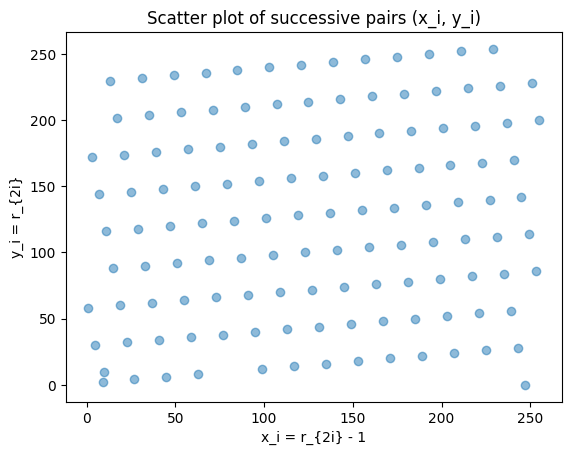

In [5]:
import matplotlib.pyplot as plt

# Generate the pairs (x_i, y_i)
pairs = [(example[(2*i)-1], example[2*i]) for i in range(256//2)]

# Separate the x and y values
x_vals = [pair[0] for pair in pairs]
y_vals = [pair[1] for pair in pairs]

# Plot the pairs
plt.scatter(x_vals, y_vals, alpha=0.5)
plt.title('Scatter plot of successive pairs (x_i, y_i)')
plt.xlabel('x_i = r_{2i} - 1')
plt.ylabel('y_i = r_{2i}')
plt.show()

I first tried the pairs as

``` python
pairs = [(example[2*i] - 1, example[2*i]) for i in range(256//2)]
```

with the first values wrong as it gave a line. The 2i-1 is the index!

To make figure 4.2 we just plot our random array vs the sequence 0 to 256, I think.

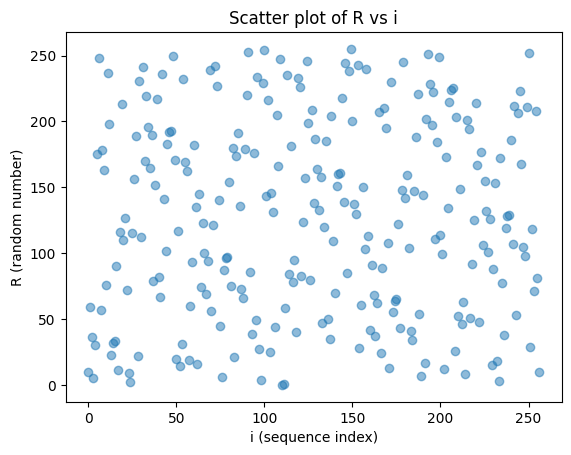

In [81]:
# Sequence index
indices = list(range(257))

# Plot R vs i
plt.scatter(indices, example, alpha=0.5)
plt.title('Scatter plot of R vs i')
plt.xlabel('i (sequence index)')
plt.ylabel('R (random number)')
plt.show()

Well, now i notice that the plot is actually normaized so lets do, that to see if that look more alike

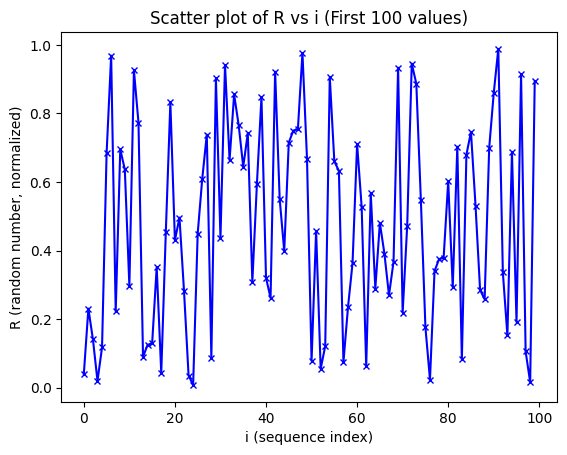

In [93]:
# Take only the first 100 values
indices = list(range(100))
normalized_R = [r / 256 for r in example[:100]]  # Normalize R to [0,1]

# Plot R vs i
plt.plot(indices, normalized_R, marker='x', linestyle='-', color='b', markersize=5)
plt.title('Scatter plot of R vs i (First 100 values)')
plt.xlabel('i (sequence index)')
plt.ylabel('R (random number, normalized)')
plt.show()

That looks similar to the book, I had to add  marker='x', linestyle='-'
on 

```python
plt.plot(indices, normalized_R, marker='x', linestyle='-', color='b', markersize=5)
```

So it looks more like the book

For the final part we use the same code as before but replace example in:

``` python
pairs = [(example[(2*i)-1], example[2*i]) for i in range(256//2)]
```

with the built in random gen


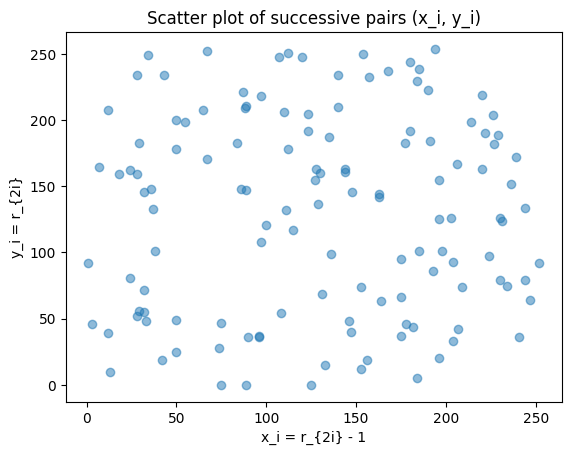

In [97]:
import random

#Generate and fill the array of random numbers
random_numbers = [random.randint(0, 255) for _ in range(256)]

# Generate the pairs (x_i, y_i)
pairs = [(random_numbers[(2*i)-1], random_numbers[2*i]) for i in range(256//2)]

# Separate the x and y values
x_vals = [pair[0] for pair in pairs]
y_vals = [pair[1] for pair in pairs]

# Plot the pairs
plt.scatter(x_vals, y_vals, alpha=0.5)
plt.title('Scatter plot of successive pairs (x_i, y_i)')
plt.xlabel('x_i = r_{2i} - 1')
plt.ylabel('y_i = r_{2i}')
plt.show()

## 4.2.1 Random Walk Implementation

The program `walk.py` in Listing 4.1 is a sample random-walk simulation. Its key element is  
the random values for the x and y components of each step,

```python
x += (random.random() - 0.5) * 2.   # -1 =< x =< 1
y += (random.random() - 0.5) * 2.   # -1 =< y =< 1
```


where here we have omitted the scaling factor that normalizes each step to length 1.  
When using your computer to simulate a random walk, you should expect to obtain (4.14)  
only as the average displacement, averaged over many trials, not necessarily as the answer  
for each trial. Your final answer will depend on just how you take your random steps (Figure 4.4 right).

Start at the origin and take a 2D random walk with your computer:

1) To increase the amount of randomness, independently choose random values for Δx′  
   and Δy′ in the range [−1,1]. Then normalize them so that each step is of unit length


$$Δx = (1/L) * Δx', Δy = (1/L) * Δy', L = \sqrt{(Δx'^2 + Δy'^2)} \tag{4.16}$$


2) Use a plotting program to draw maps of several independent 2D random walks, each of  
1000 steps. Based on your simulations, comment on whether the results look like what  
you would expect a random walk to look like.

3) If you have your walker taking N steps in a single trial, then conduct a total number  
$K \simeq sqrt(N)$ of trials. Each trial should have N steps and start with a different seed.


4) Calculate the mean square distance \( R^2 \) for each trial and then take the average  
of \( R^2 \) for all your \( K \) trials:

$$
\langle R^2(N) \rangle = \frac{1}{K} \sum_{k=1}^{K} R^2_{(k)}(N). \tag{4.17}
$$

5) Check the validity of the assumptions made in deriving the theoretical result (4.14)  
by checking how well

$$
\frac{\langle \Delta x_i \Delta x_{j \neq i} \rangle}{R^2} \simeq \frac{\langle \Delta x_i \Delta y_j \rangle}{R^2} \simeq 0. \tag{4.18}
$$

Do your checking for both a single (long) run and for the average over trials.

6) Plot the RMS distance, $R_{\text{rms}} = \sqrt{\langle R^2(N) \rangle}$ as a function of $\sqrt{N}$.  
Values of $N$ should start with a small number, where $R \simeq \sqrt{N}$ is not expected to be accurate,  
and end at a quite large value, where two or three places of accuracy should be expected on the average.

7) ☉ Repeat the preceding and following analysis for a 3D walk as well.

                  

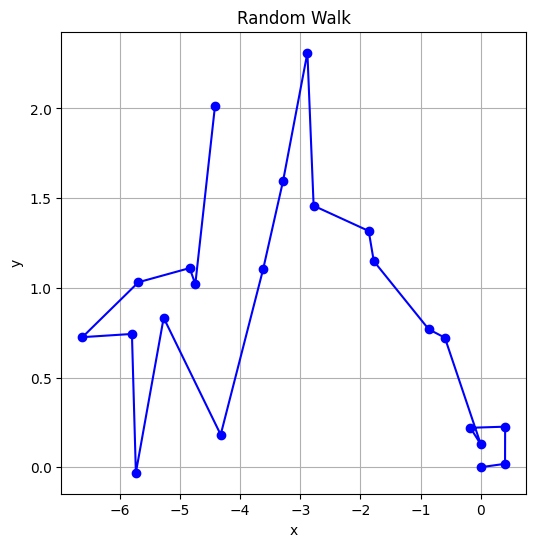

In [4]:
#from walk.py file

import random
import matplotlib.pyplot as plt

random.seed(None)  # None => system clock
jmax = 20
x, y = 0.0, 0.0  # Start at origin

# Lists to store walk coordinates
x_vals = [x]
y_vals = [y]

for _ in range(jmax + 1):         #for _ since we are not using i (index) inside the loop
    x += (random.random() - 0.5) * 2  # -1 <= x <= 1
    y += (random.random() - 0.5) * 2  # -1 <= y <= 1
    x_vals.append(x)
    y_vals.append(y)

# Plot the random walk
plt.figure(figsize=(6, 6))
plt.plot(x_vals, y_vals, marker='o', linestyle='-', color='blue')
plt.title("Random Walk")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

Everytime you run it, it plots a different walk, which make sense since is random, let's try add more randomness
to it as 1) asks

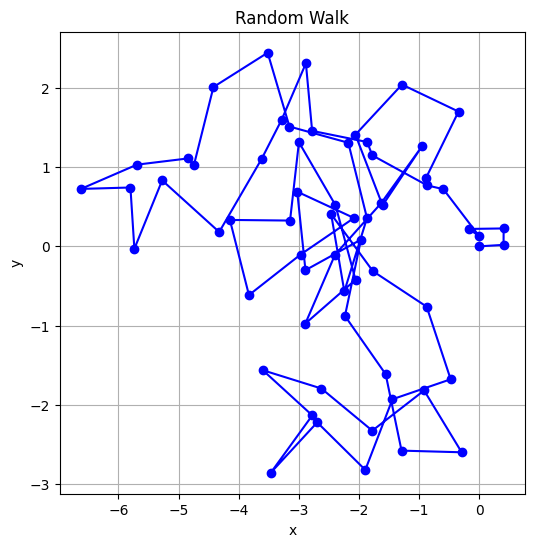

In [7]:
import math

for _ in range(jmax + 1):
    dx_prime = (random.random() - 0.5) * 2  # -1 <= dx' <= 1
    dy_prime = (random.random() - 0.5) * 2  # -1 <= dy' <= 1
    L = math.sqrt(dx_prime**2 + dy_prime**2)  # Normalize step length
    dx = (1 / L) * dx_prime
    dy = (1 / L) * dy_prime
    x += dx
    y += dy
    x_vals.append(x)
    y_vals.append(y)

# Plot the random walk
plt.figure(figsize=(6, 6))
plt.plot(x_vals, y_vals, marker='o', linestyle='-', color='blue')
plt.title("Random Walk")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

here we used a random dx_prime with 

`random.random()`

that generates a random float in the range [0,1).

Subtracting 0.5 shifts the range to [−0.5,0.5).

Multiplying by 2 scales this range to [-1,1).

Then we normalize, find dx and dy, and everything follows as the `walk.py` program.

For 2) we do:

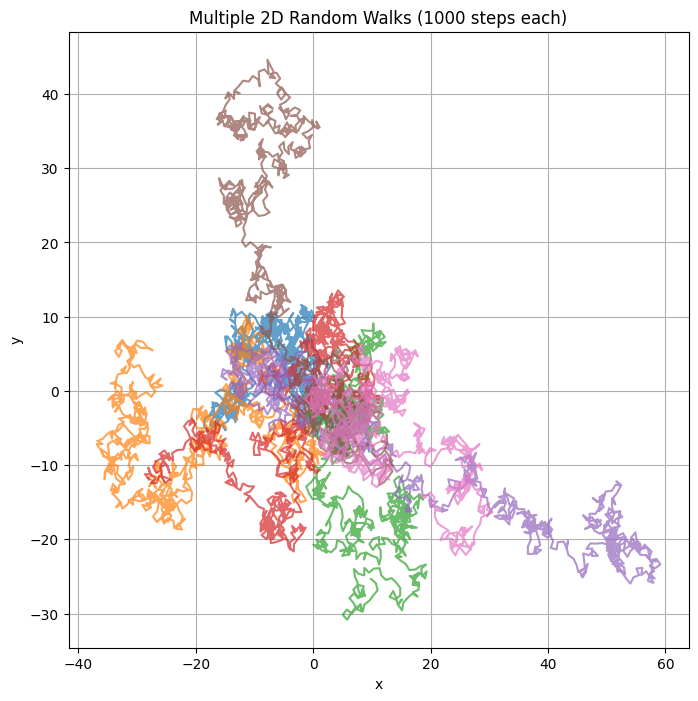

In [9]:
import random
import math
import matplotlib.pyplot as plt

random.seed(None)  # None => system clock
num_walks = 7  # Number of independent random walks
num_steps = 1000  # Number of steps per walk, we are required 1000, before it was jmax = 20

plt.figure(figsize=(8, 8)) #bigger plot to see


# nested for so we do the above code multiple times
for _ in range(num_walks):
    # each walk is independent so we initialize everything each time
    x, y = 0.0, 0.0  # Start at origin
    x_vals = [x]
    y_vals = [y]

    for _ in range(num_steps):
        dx_prime = (random.random() - 0.5) * 2  # -1 <= dx' <= 1
        dy_prime = (random.random() - 0.5) * 2  # -1 <= dy' <= 1
        L = math.sqrt(dx_prime**2 + dy_prime**2)  # Normalize step length
        dx = (1 / L) * dx_prime
        dy = (1 / L) * dy_prime
        x += dx
        y += dy
        x_vals.append(x)
        y_vals.append(y)
    
    plt.plot(x_vals, y_vals, linestyle='-', alpha=0.7)  # Plot each walk

plt.title("Multiple 2D Random Walks (1000 steps each)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


It looks random enough to me! They all start at the origin,
then they all go different directions on same number of steps.

Number 3 is saying that we need to do $K \simeq sqrt(N)$ of trial with a different seed. I think my plot
above has them all with the same seed tho. Anyway so for $N = 1000$, $k$ is

In [11]:
k = math.sqrt(num_steps) 
k

31.622776601683793

so let's say $k=31$, let's implement it again

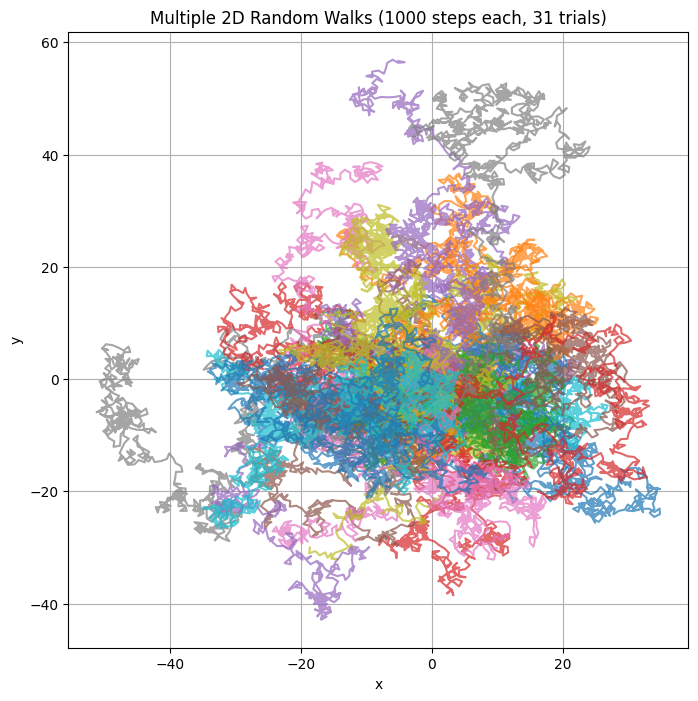

In [12]:
import random
import math
import matplotlib.pyplot as plt

#move the seed inside the loop
num_steps = 1000  # Number of steps per walk
num_walks = int(math.sqrt(num_steps))  # Number of independent random walks, using the formula above

plt.figure(figsize=(8, 8))

for i in range(num_walks):
    random.seed(i)  #Each walk has a different "random" seed
    #same from above
    x, y = 0.0, 0.0  # Start at origin
    x_vals = [x]
    y_vals = [y]

    for _ in range(num_steps):
        dx_prime = (random.random() - 0.5) * 2  # -1 <= dx' <= 1
        dy_prime = (random.random() - 0.5) * 2  # -1 <= dy' <= 1
        L = math.sqrt(dx_prime**2 + dy_prime**2)  # Normalize step length
        dx = (1 / L) * dx_prime
        dy = (1 / L) * dy_prime
        x += dx
        y += dy
        x_vals.append(x)
        y_vals.append(y)
    
    plt.plot(x_vals, y_vals, linestyle='-', alpha=0.7)  # Plot each walk

plt.title(f"Multiple 2D Random Walks ({num_steps} steps each, {num_walks} trials)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


Now we are asked to calculate mean square distance for each k on top of that, so i'm going to keep copying
the code above and tweaking it so it shows more things.

⟨R²(N)⟩ = 679.591142519956


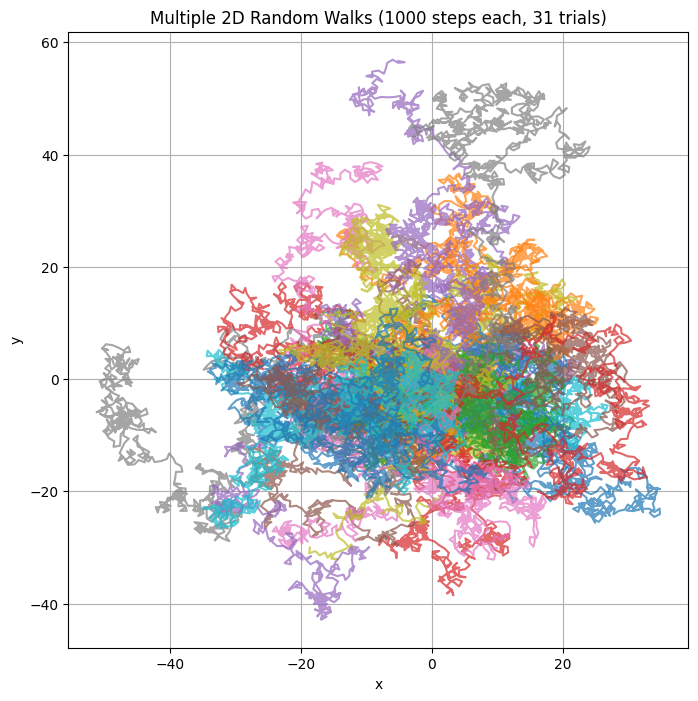

In [14]:
import random
import math
import matplotlib.pyplot as plt

num_steps = 1000  # Number of steps per walk
num_walks = int(math.sqrt(num_steps))  # Number of independent random walks

plt.figure(figsize=(8, 8))
mean_square_distances = [] #this is the new part, so we can store the calculated R^2s

for i in range(num_walks):
    random.seed(i)  # Ensure each walk has a different random seed
    x, y = 0.0, 0.0  # Start at origin
    x_vals = [x]
    y_vals = [y]

    for _ in range(num_steps):
        dx_prime = (random.random() - 0.5) * 2  # -1 <= dx' <= 1
        dy_prime = (random.random() - 0.5) * 2  # -1 <= dy' <= 1
        L = math.sqrt(dx_prime**2 + dy_prime**2)  # Normalize step length
        dx = (1 / L) * dx_prime
        dy = (1 / L) * dy_prime
        x += dx
        y += dy
        x_vals.append(x)
        y_vals.append(y)
    
    plt.plot(x_vals, y_vals, linestyle='-', alpha=0.7)  # Plot each walk


    R_squared = x**2 + y**2  # Calculate R^2 for this trial
    mean_square_distances.append(R_squared) #add it to my array for later use

# Now that all steps were taken we can
# compute average mean square distance
average_R_squared = sum(mean_square_distances) / num_walks 
print(f"⟨R²(N)⟩ = {average_R_squared}") #and print

plt.title(f"Multiple 2D Random Walks ({num_steps} steps each, {num_walks} trials)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


5) What does the eq means?
$$
\frac{\langle \Delta x_i \Delta x_{j \neq i} \rangle}{R^2} \simeq \frac{\langle \Delta y_i \Delta y_j \rangle}{R^2} \simeq 0. \tag{4.18}
$$

I don't really know, see eq 4.13 for the composition of $R^2$

We had:

``` python
    x = dx = (1 / L) * dx_prime
    y = dy = (1 / L) * dy_prime
```

Inside a loop for the number of steps, so efectively we have an array of each of them
then we can compare

``` python
    ((dx[i] * dx[j])/num_steps) / R_squared # with j being different from i, with the average
        
    ((dy[i] * dy[j])/num_steps) / R_squared
```

and each of them would give 0. For me I've been storing them in x_vals,y_vals arrays so lets use those.

0.0010814936926584245 0.0006727073753419623
⟨R²(N)⟩ = 391.59874727781727


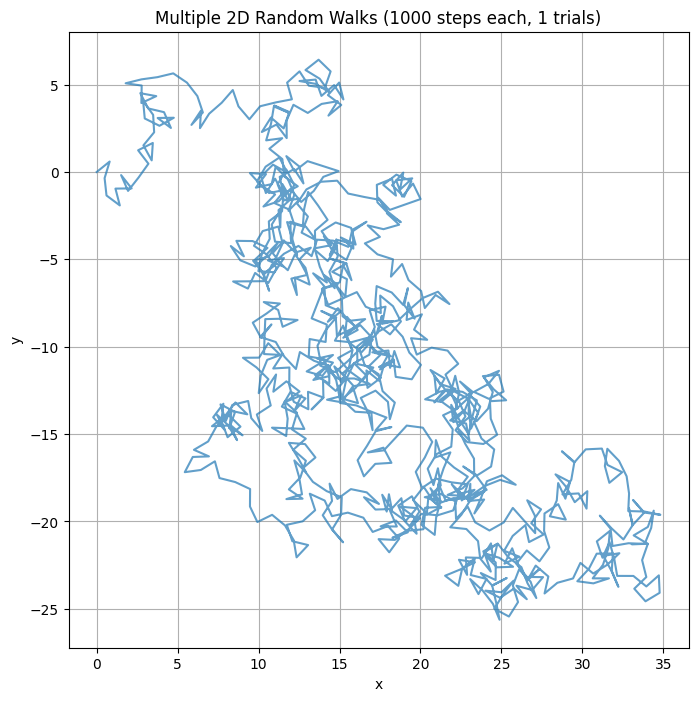

In [21]:
import random
import math
import matplotlib.pyplot as plt

num_steps = 1000  # Number of steps per walk
num_walks = 1 #int(math.sqrt(num_steps))  # Number of independent random walks #changed to 1 so single run

plt.figure(figsize=(8, 8))
mean_square_distances = [] #this is the new part, so we can store the calculated R^2s

for i in range(num_walks):
    random.seed(i)  # Ensure each walk has a different random seed
    x, y = 0.0, 0.0  # Start at origin
    x_vals = [x]
    y_vals = [y]

    for _ in range(num_steps):
        dx_prime = (random.random() - 0.5) * 2  # -1 <= dx' <= 1
        dy_prime = (random.random() - 0.5) * 2  # -1 <= dy' <= 1
        L = math.sqrt(dx_prime**2 + dy_prime**2)  # Normalize step length
        dx = (1 / L) * dx_prime
        dy = (1 / L) * dy_prime
        x += dx
        y += dy
        x_vals.append(x)
        y_vals.append(y)
    
    plt.plot(x_vals, y_vals, linestyle='-', alpha=0.7)  # Plot each walk


    R_squared = x**2 + y**2  # Calculate R^2 for this trial
    mean_square_distances.append(R_squared) #add it to my array for later use

    #5)
    for i in range(num_steps):
        for j in range(i, num_steps):
            if (i != j):
                a = ((2 * x_vals[i] * x_vals[j])/num_steps)/R_squared
                b = ((2 * y_vals[i] * y_vals[j])/num_steps)/R_squared
    print(a,b)


# Now that all steps were taken we can
# compute average mean square distance
average_R_squared = sum(mean_square_distances) / num_walks 
print(f"⟨R²(N)⟩ = {average_R_squared}") #and print

plt.title(f"Multiple 2D Random Walks ({num_steps} steps each, {num_walks} trials)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


Then for multiple runs we can change the varibles to lists and 
store multiple in the same then take the mean of them with 

``` python
import statistics 
statistics.mean()
```

and looks like this, 

``` python
#5) Multiple runs
    validityX = []
    validityY = []
    for i in range(num_steps):
        for j in range(i, num_steps):
            if (i != j):
                validityX.append(((2 * x_vals[i] * x_vals[j])/num_steps)/R_squared)
                validityY.append(((2 * y_vals[i] * y_vals[j])/num_steps)/R_squared)
    validityXmean = statistics.mean(validityX)
    validityYmean = statistics.mean(validityY)
```


however this is very inefficient and is taking a long time to run. So lets try use
some python tools with numpy package to manipulate vectors better.

Walk 1: ⟨Δx_i Δx_j⟩/R² ≈ 1.55e-03, ⟨Δy_i Δy_j⟩/R² ≈ 6.74e-04
Walk 2: ⟨Δx_i Δx_j⟩/R² ≈ 6.25e-05, ⟨Δy_i Δy_j⟩/R² ≈ 3.16e-04
Walk 3: ⟨Δx_i Δx_j⟩/R² ≈ 6.24e-04, ⟨Δy_i Δy_j⟩/R² ≈ 2.83e-04
Walk 4: ⟨Δx_i Δx_j⟩/R² ≈ 8.58e-05, ⟨Δy_i Δy_j⟩/R² ≈ 1.03e-03
Walk 5: ⟨Δx_i Δx_j⟩/R² ≈ 2.14e-04, ⟨Δy_i Δy_j⟩/R² ≈ 2.52e-04
Walk 6: ⟨Δx_i Δx_j⟩/R² ≈ 6.22e-04, ⟨Δy_i Δy_j⟩/R² ≈ 2.81e-04
Walk 7: ⟨Δx_i Δx_j⟩/R² ≈ 4.76e-05, ⟨Δy_i Δy_j⟩/R² ≈ 1.17e-04
⟨R²(N)⟩ = 560.5894295290772


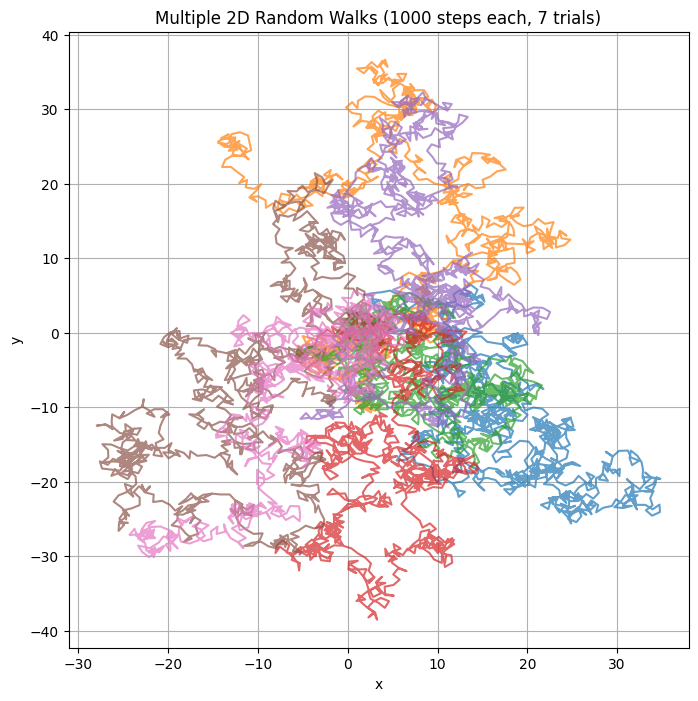

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

num_steps = 1000  
num_walks = 7  

plt.figure(figsize=(8, 8))
mean_square_distances = []  

for walk in range(num_walks):
    random.seed(walk)  
    x, y = 0.0, 0.0  
    x_vals, y_vals = [x], [y]

    for _ in range(num_steps):
        dx_prime = (random.random() - 0.5) * 2  
        dy_prime = (random.random() - 0.5) * 2  
        L = np.sqrt(dx_prime**2 + dy_prime**2)  
        dx = dx_prime / L
        dy = dy_prime / L
        x += dx
        y += dy
        x_vals.append(x)
        y_vals.append(y)

    plt.plot(x_vals, y_vals, linestyle='-', alpha=0.7)

    R_squared = x**2 + y**2  
    mean_square_distances.append(R_squared)

    # Convert to numpy arrays for efficiency
    x_vals = np.array(x_vals[:-1])  # Exclude final step
    y_vals = np.array(y_vals[:-1])

    # Compute pairwise correlations (Eq. 4.18)
    N = num_steps
    correlation_x = (2 * np.outer(x_vals, x_vals) / N) / R_squared
    correlation_y = (2 * np.outer(y_vals, y_vals) / N) / R_squared

    # Only consider the off-diagonal elements (i ≠ j)
    off_diag_x = correlation_x[~np.eye(N, dtype=bool)]
    off_diag_y = correlation_y[~np.eye(N, dtype=bool)]

    # Compute mean correlation
    validityXmean = np.mean(off_diag_x)
    validityYmean = np.mean(off_diag_y)

    # Check how close they are to zero
    print(f"Walk {walk+1}: ⟨Δx_i Δx_j⟩/R² ≈ {validityXmean:.2e}, ⟨Δy_i Δy_j⟩/R² ≈ {validityYmean:.2e}")

# Compute average R²
average_R_squared = sum(mean_square_distances) / num_walks
print(f"⟨R²(N)⟩ = {average_R_squared}")

plt.title(f"Multiple 2D Random Walks ({num_steps} steps each, {num_walks} trials)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


For 6) we need to generate a plot of $R_rms$ vs. $N$

we need to:

- Run multiple simulations for different values of 
$N$ (from small $N$ to large $N$).
- Store $R_rms$ for each $N$

and then plot the trend.

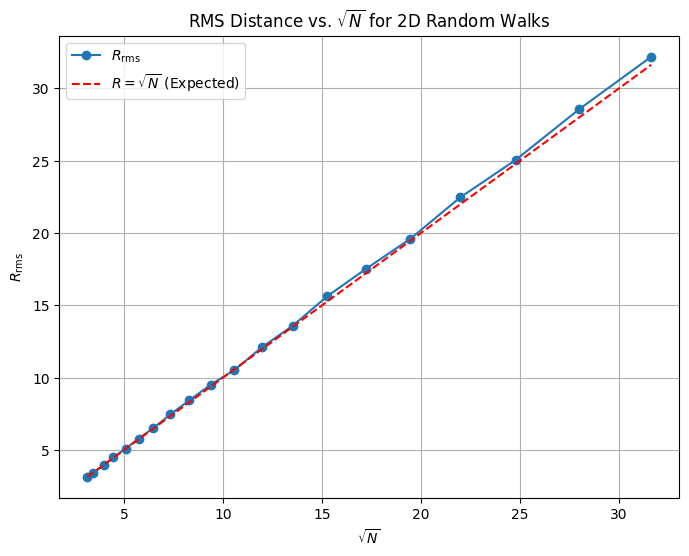

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

num_walks = 1000  # Number of walks per N
N_values = np.logspace(1, 3, 20, dtype=int)  # Log-spaced values of N from 10 to 1000

R_rms_values = []  
sqrt_N_values = np.sqrt(N_values)

for num_steps in N_values:
    mean_square_distances = []  

    for walk in range(num_walks):
        random.seed(walk)  
        x, y = 0.0, 0.0  

        for _ in range(num_steps):
            dx_prime = (random.random() - 0.5) * 2  
            dy_prime = (random.random() - 0.5) * 2  
            L = np.sqrt(dx_prime**2 + dy_prime**2)  
            dx = dx_prime / L
            dy = dy_prime / L
            x += dx
            y += dy

        R_squared = x**2 + y**2  
        mean_square_distances.append(R_squared)

    # Compute RMS distance
    R_rms = np.sqrt(sum(mean_square_distances) / num_walks)
    R_rms_values.append(R_rms)

# Plot R_rms vs. sqrt(N)
plt.figure(figsize=(8, 6))
plt.plot(sqrt_N_values, R_rms_values, 'o-', label=r"$R_{\text{rms}}$")
plt.plot(sqrt_N_values, sqrt_N_values, 'r--', label=r"$R = \sqrt{N}$ (Expected)")
plt.xlabel(r"$\sqrt{N}$")
plt.ylabel(r"$R_{\text{rms}}$")
plt.title(r"RMS Distance vs. $\sqrt{N}$ for 2D Random Walks")
plt.legend()
plt.grid()
plt.show()


Now for 7) lets copy everything from above and add a set of arrays
to account for the extra dimension, it should be that hard is it?

<Figure size 1200x500 with 0 Axes>

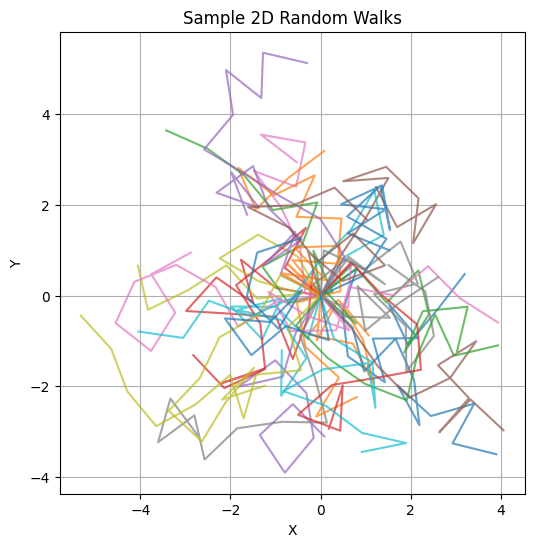

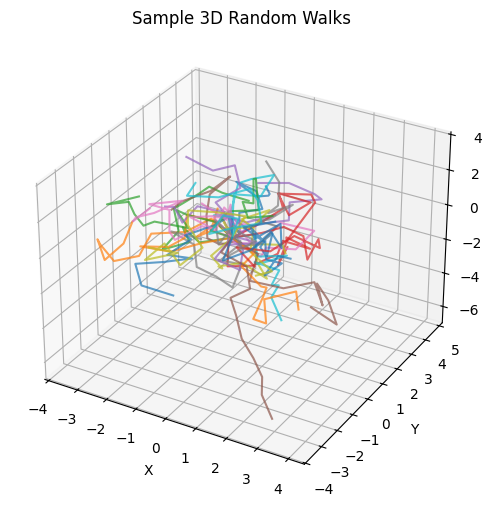

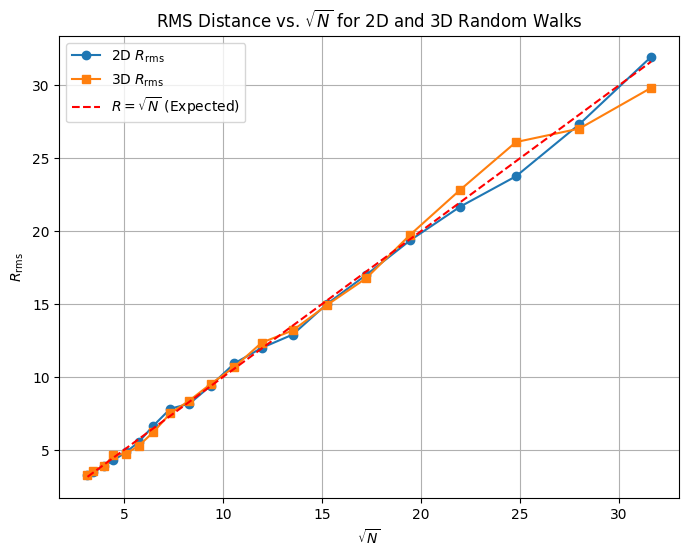

In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt

num_walks = 100  # Number of walks per N
N_values = np.logspace(1, 3, 20, dtype=int)  # Log-spaced values of N from 10 to 1000

R_rms_2D = []  
R_rms_3D = []  
sqrt_N_values = np.sqrt(N_values)

plt.figure(figsize=(12, 5))

for num_steps in N_values:
    mean_square_distances_2D = []  
    mean_square_distances_3D = []  

    # Plot sample walks for first N value
    if num_steps == N_values[0]:
        fig_2D, ax_2D = plt.subplots(figsize=(6, 6))
        fig_3D = plt.figure(figsize=(6, 6))
        ax_3D = fig_3D.add_subplot(111, projection='3d')

    for walk in range(num_walks):
        random.seed(walk)  
        x_2D, y_2D = 0.0, 0.0  
        x_3D, y_3D, z_3D = 0.0, 0.0, 0.0  

        x_vals_2D, y_vals_2D = [x_2D], [y_2D]
        x_vals_3D, y_vals_3D, z_vals_3D = [x_3D], [y_3D], [z_3D]

        # 2D Walk
        for _ in range(num_steps):
            dx_prime = (random.random() - 0.5) * 2  
            dy_prime = (random.random() - 0.5) * 2  
            L = np.sqrt(dx_prime**2 + dy_prime**2)  
            dx, dy = dx_prime / L, dy_prime / L
            x_2D += dx
            y_2D += dy
            x_vals_2D.append(x_2D)
            y_vals_2D.append(y_2D)

        R_squared_2D = x_2D**2 + y_2D**2  
        mean_square_distances_2D.append(R_squared_2D)

        # 3D Walk
        for _ in range(num_steps):
            dx_prime = (random.random() - 0.5) * 2  
            dy_prime = (random.random() - 0.5) * 2  
            dz_prime = (random.random() - 0.5) * 2  
            L = np.sqrt(dx_prime**2 + dy_prime**2 + dz_prime**2)  
            dx, dy, dz = dx_prime / L, dy_prime / L, dz_prime / L
            x_3D += dx
            y_3D += dy
            z_3D += dz
            x_vals_3D.append(x_3D)
            y_vals_3D.append(y_3D)
            z_vals_3D.append(z_3D)

        R_squared_3D = x_3D**2 + y_3D**2 + z_3D**2  
        mean_square_distances_3D.append(R_squared_3D)

        # Plot only a few sample walks for visualization 31 walks
        if num_steps == N_values[0] and walk < 31:
            ax_2D.plot(x_vals_2D, y_vals_2D, linestyle='-', alpha=0.7)
            ax_3D.plot(x_vals_3D, y_vals_3D, z_vals_3D, linestyle='-', alpha=0.7)

    # Compute RMS distance for 2D and 3D
    R_rms_2D.append(np.sqrt(sum(mean_square_distances_2D) / num_walks))
    R_rms_3D.append(np.sqrt(sum(mean_square_distances_3D) / num_walks))

# Plot sample 2D and 3D walks
ax_2D.set_title("Sample 2D Random Walks")
ax_2D.set_xlabel("X")
ax_2D.set_ylabel("Y")
ax_2D.grid()

ax_3D.set_title("Sample 3D Random Walks")
ax_3D.set_xlabel("X")
ax_3D.set_ylabel("Y")
ax_3D.set_zlabel("Z")

plt.show()

# Plot R_rms vs. sqrt(N) for 2D and 3D walks
plt.figure(figsize=(8, 6))
plt.plot(sqrt_N_values, R_rms_2D, 'o-', label=r"2D $R_{\text{rms}}$")
plt.plot(sqrt_N_values, R_rms_3D, 's-', label=r"3D $R_{\text{rms}}$")
plt.plot(sqrt_N_values, sqrt_N_values, 'r--', label=r"$R = \sqrt{N}$ (Expected)")
plt.xlabel(r"$\sqrt{N}$")
plt.ylabel(r"$R_{\text{rms}}$")
plt.title(r"RMS Distance vs. $\sqrt{N}$ for 2D and 3D Random Walks")
plt.legend()
plt.grid()
plt.show()

## 4.2.2 Random Walks in a Brain

1) Try to reproduce the simulation shown on the left of Figure 4.5 by recording and plotting 50 walks, with each walk assigned to one of six colors. Start the walks at the origin, use equal-sized steps, and restrict the simulation space to two dimensions.

2) As shown on the right of Figure 4.4, determine the average over all your walks of the RMS distance covered, $R_{\text{rms}}$.

3) Take the same 2D space covered in your simulations, and now insert circular obstructions of varied sizes, similar to those on the right of Figure 4.5.

4) Yet again, conduct and record 50 walks, with each walk assigned to one of six colors. Start the walks at the origin, use equal-sized steps, but include obstructions that stop the walks when they hit them.

5) Determine again the average over all your obstructed walks of the RMS distance covered, $ R_{\text{rms}} $. The obstructions should lead to a decreased $ R_{\text{rms}} $.

6) Again, conduct and record 50 walks, with each walk assigned to one of six colors. Start the walks at the origin, use equal-sized steps, but include obstructions that repel, but don’t stop, the walks when they hit.

7) Again, determine the average over all your obstructed walks of the RMS distance covered, $ R_{\text{rms}} $, and compare to the previous two results.

8) In Einstein’s 1905 paper *Investigations on the Theory of the Brownian Movement*, he proposed that the effective diffusion coefficient within a medium is $ D = \frac{R_{\text{rms}}^2}{2dt} $, where $ d $ is the number of spatial dimensions (2 for a 2D simulation), and $ t $ is the average time for a walk. How much of an effect do the obstructions cause on $ D $?

9) Repeat the problem for a three-dimensional volume.


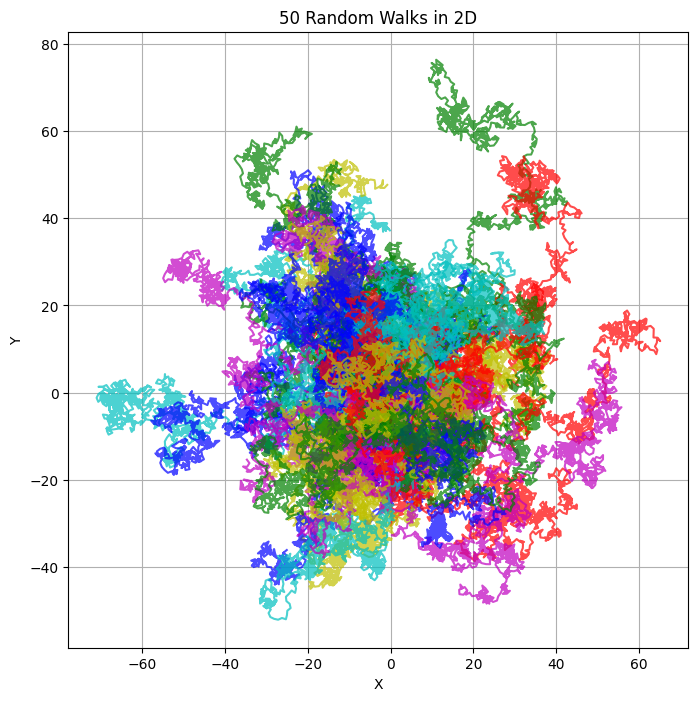

In [15]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Constants
num_walks = 50
num_steps = 1500
step_size = 1
colors = ['b', 'g', 'r', 'c', 'm', 'y']  # Six colors

def random_walk_2d(num_steps):
    """Generates a 2D random walk with equal step sizes."""
    x, y = np.zeros(num_steps), np.zeros(num_steps)  # Arrays for positions
    for i in range(1, num_steps):
        dx_prime = (random.random() - 0.5) * 2  # Random number between -1 and 1
        dy_prime = (random.random() - 0.5) * 2  
        L = np.sqrt(dx_prime**2 + dy_prime**2)  # Normal ize step size
        dx = (dx_prime / L) * step_size
        dy = (dy_prime / L) * step_size
        x[i] = x[i-1] + dx
        y[i] = y[i-1] + dy
    return x, y

# 1) Simulate and plot 50 random walks
# Store the values of each walk for later calculations
walks = []  # List to store each random walk's (x, y) data

plt.figure(figsize=(8, 8))
for i in range(num_walks):
    x, y = random_walk_2d(num_steps)
    walks.append((x, y))  # Store the walk in the list
    plt.plot(x, y, color=colors[i % len(colors)], alpha=0.7)

plt.title("50 Random Walks in 2D")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

In [19]:
# 2) Compute RMS distance
def rms_distance(x, y):
    """Computes the RMS distance from the origin (0,0) for a walk."""
    distances = np.sqrt(x**2 + y**2)  # Compute the distance from origin at each step
    rms_dist = np.sqrt(np.mean(distances**2))  # RMS of the distances
    return rms_dist

rms_distances = []  # List to store RMS distances for each walk

# Loop through the stored walks and compute the RMS distance for each
for x, y in walks:
    rms_dist = rms_distance(x, y)
    rms_distances.append(rms_dist)

# Output the RMS distances for all walks
print("RMS Distances for each walk:")
for i, rms_dist in enumerate(rms_distances, 1):
    print(f"Walk {i}: {rms_dist:.2f}")

# Compute the average RMS distance over all walks
average_rms = np.mean(rms_distances)

# Print the average RMS distance
print(f"Average RMS Distance over all walks: {average_rms:.2f}")

RMS Distances for each walk:
Walk 1: 23.15
Walk 2: 47.86
Walk 3: 14.57
Walk 4: 29.00
Walk 5: 16.50
Walk 6: 28.07
Walk 7: 29.53
Walk 8: 40.77
Walk 9: 40.58
Walk 10: 20.54
Walk 11: 12.13
Walk 12: 31.88
Walk 13: 14.64
Walk 14: 17.21
Walk 15: 11.40
Walk 16: 47.58
Walk 17: 31.04
Walk 18: 19.62
Walk 19: 35.20
Walk 20: 23.41
Walk 21: 22.76
Walk 22: 13.90
Walk 23: 34.23
Walk 24: 20.69
Walk 25: 25.10
Walk 26: 27.93
Walk 27: 34.17
Walk 28: 18.09
Walk 29: 33.87
Walk 30: 25.47
Walk 31: 25.24
Walk 32: 16.92
Walk 33: 18.04
Walk 34: 35.15
Walk 35: 9.99
Walk 36: 20.30
Walk 37: 24.25
Walk 38: 14.86
Walk 39: 33.90
Walk 40: 15.13
Walk 41: 23.97
Walk 42: 21.32
Walk 43: 20.78
Walk 44: 23.88
Walk 45: 11.81
Walk 46: 26.53
Walk 47: 36.68
Walk 48: 9.94
Walk 49: 22.65
Walk 50: 20.49
Average RMS Distance over all walks: 24.45


In [20]:
# 3) Introduce circular obstructions
obstructions = []
num_obstructions = 20
space_limit = 50

for _ in range(num_obstructions):
    x_c, y_c = np.random.uniform(-space_limit, space_limit, 2)
    radius = np.random.uniform(2, 8)
    obstructions.append((x_c, y_c, radius))

def is_valid_step(x, y):
    """ Verify if a step isn't between an obstruction."""
    for x_c, y_c, r in obstructions:
        if (x - x_c) ** 2 + (y - y_c) ** 2 < r ** 2:
            return False
    return True

In [21]:
obstructions

[(np.float64(24.95813543834099),
  np.float64(35.04850757172622),
  7.820847600528525),
 (np.float64(-21.49341590276976),
  np.float64(1.8761190945992183),
  7.001219410259247),
 (np.float64(19.087366806805477),
  np.float64(11.595548339750628),
  6.51977673977736),
 (np.float64(-4.760561295514897),
  np.float64(6.982501620567604),
  2.20092592226693),
 (np.float64(40.654151233008434),
  np.float64(-18.485387439408242),
  4.334417577886985),
 (np.float64(23.120690601153782),
  np.float64(20.408866285033895),
  3.8367023252294414),
 (np.float64(-14.06061768242828),
  np.float64(-15.510664102582908),
  7.573662497515459),
 (np.float64(7.066875465259372),
  np.float64(-15.515911590067411),
  7.782738567287789),
 (np.float64(-37.76972180182317),
  np.float64(-38.969681751464435),
  2.8145938163187427),
 (np.float64(-1.164986393850839),
  np.float64(-30.654815496937506),
  5.428505120801023),
 (np.float64(-40.69420910864967),
  np.float64(17.160004735806297),
  5.3295272319942555),
 (np.flo

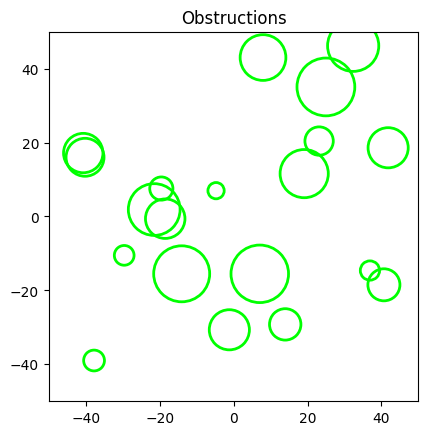

In [22]:
# Draw the obstructions
for x_c, y_c, r in obstructions:
    circle = plt.Circle((x_c, y_c), r, color='lime', fill=False, linewidth=2)
    plt.gca().add_patch(circle)

plt.xlim(-space_limit, space_limit)
plt.ylim(-space_limit, space_limit)
plt.gca().set_aspect('equal')
plt.title("Obstructions")
plt.show()

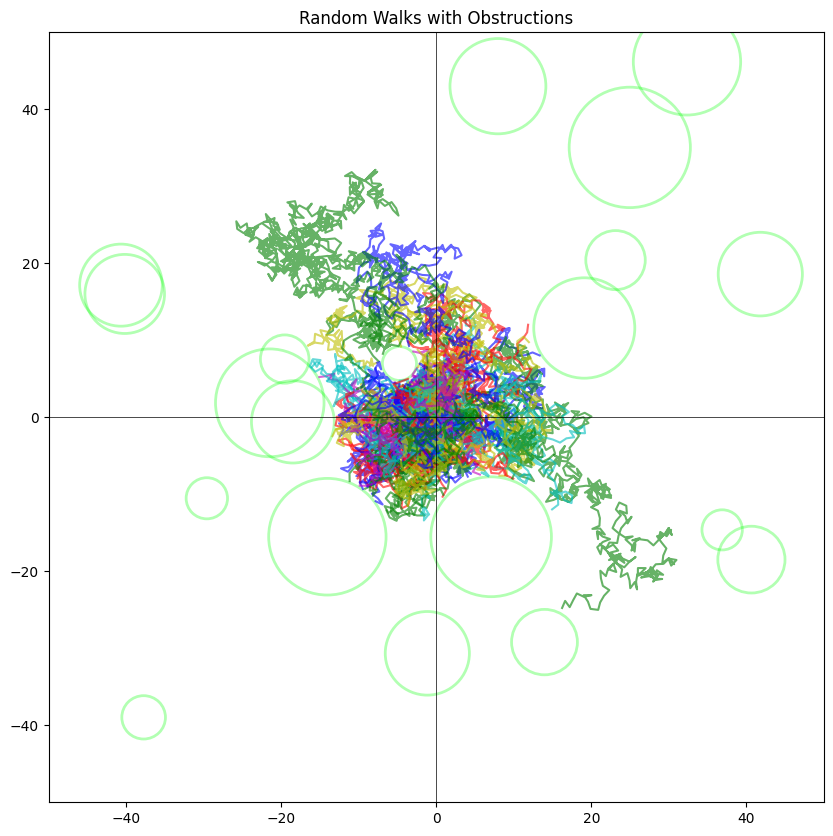

In [27]:
# 4) Redo generation of randomwalks with conditions 

def random_walk_2d_obstructed(num_steps):
    """Generates a 2D random walk with obstructions."""
    x, y = np.zeros(num_steps), np.zeros(num_steps)  # Start at origin
    for i in range(1, num_steps):
        dx_prime = (random.random() - 0.5) * 2  # Random number between -1 and 1
        dy_prime = (random.random() - 0.5) * 2  
        L = np.sqrt(dx_prime**2 + dy_prime**2)  # Normalize step size
        dx = (dx_prime / L) * step_size
        dy = (dy_prime / L) * step_size
        
        new_x, new_y = x[i-1] + dx, y[i-1] + dy
        
        if is_valid_step(new_x, new_y):  # Only move if valid
            x[i], y[i] = new_x, new_y
        else:
            return x[:i], y[:i]  # Stop the walk when hitting an obstruction
    return x, y


# Store the values of each walk for later calculations
walks_obstructions = []  # List to store each random walk's (x, y) data

# Plot walks and obstructions
plt.figure(figsize=(10, 10))

# Plot obstructions
for x_c, y_c, r in obstructions:
    circle = plt.Circle((x_c, y_c), r, color='lime',fill=False, linewidth=2, alpha=0.3)
    plt.gca().add_patch(circle)

# Generate and plot walks
for i in range(num_walks):
    x_walk, y_walk = random_walk_2d_obstructed(num_steps)
    walks_obstructions.append((x_walk, y_walk))  # Store the walk in the list
    plt.plot(x_walk, y_walk, color=colors[i % len(colors)], alpha=0.6)

plt.xlim(-space_limit, space_limit)
plt.ylim(-space_limit, space_limit)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("Random Walks with Obstructions")
plt.show()

In [28]:
# 5) Compute RMS distance for obstructed walks
rms_distances_obstructed = []  # List to store RMS distances for each walk

# Loop through the stored walks and compute the RMS distance for each
for x, y in walks_obstructions:
    rms_dist = rms_distance(x, y)
    rms_distances_obstructed.append(rms_dist)

# Output the RMS distances for all walks
print("RMS Distances for each walk:")
for i, rms_dist in enumerate(rms_distances_obstructed, 1):
    print(f"Walk {i}: {rms_dist:.2f}")

# Compute the average RMS distance over all walks
average_rms_obstructed = np.mean(rms_distances_obstructed)

# Print the average RMS distance
print(f"Average RMS Distance over all walks: {average_rms_obstructed:.2f}")

RMS Distances for each walk:
Walk 1: 9.25
Walk 2: 20.61
Walk 3: 7.26
Walk 4: 9.40
Walk 5: 5.03
Walk 6: 9.40
Walk 7: 5.88
Walk 8: 7.51
Walk 9: 5.58
Walk 10: 11.73
Walk 11: 4.39
Walk 12: 5.10
Walk 13: 6.16
Walk 14: 8.83
Walk 15: 4.97
Walk 16: 7.75
Walk 17: 5.17
Walk 18: 8.88
Walk 19: 7.45
Walk 20: 7.55
Walk 21: 6.57
Walk 22: 8.31
Walk 23: 4.82
Walk 24: 2.99
Walk 25: 4.07
Walk 26: 3.90
Walk 27: 8.45
Walk 28: 9.72
Walk 29: 6.73
Walk 30: 8.25
Walk 31: 7.03
Walk 32: 12.28
Walk 33: 9.38
Walk 34: 6.69
Walk 35: 3.82
Walk 36: 5.63
Walk 37: 5.39
Walk 38: 8.82
Walk 39: 10.07
Walk 40: 6.34
Walk 41: 8.11
Walk 42: 11.92
Walk 43: 15.95
Walk 44: 4.64
Walk 45: 4.02
Walk 46: 3.90
Walk 47: 3.84
Walk 48: 7.89
Walk 49: 6.75
Walk 50: 23.16
Average RMS Distance over all walks: 7.75


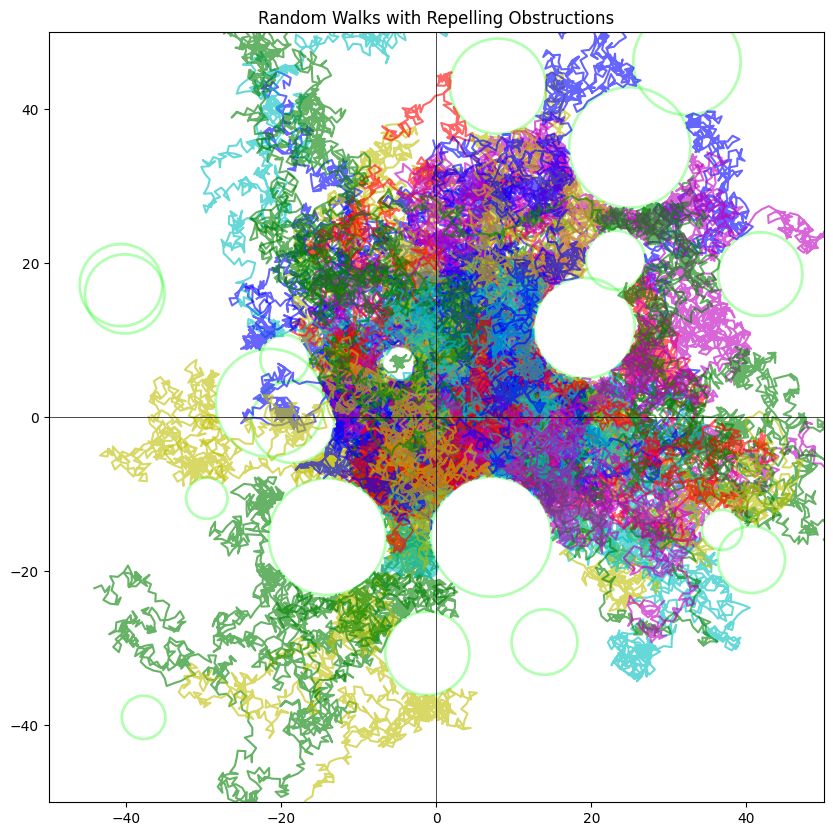

In [29]:
# 6) Repelling obstructions (instead of stopping, they reflect)
def reflect_step(x, y, dx, dy):
    """ Reflect the step off an obstruction."""
    for x_c, y_c, r in obstructions:
        if (x - x_c) ** 2 + (y - y_c) ** 2 < r ** 2:
            normal_x, normal_y = x - x_c, y - y_c
            norm = np.sqrt(normal_x**2 + normal_y**2)
            normal_x, normal_y = normal_x / norm, normal_y / norm
            dot_product = dx * normal_x + dy * normal_y
            dx -= 2 * dot_product * normal_x
            dy -= 2 * dot_product * normal_y
    return dx, dy

def random_walk_2d_reflected(num_steps):
    """Generates a 2D random walk with repelling obstructions."""
    x, y = np.zeros(num_steps), np.zeros(num_steps)  # Start at origin
    for i in range(1, num_steps):
        dx_prime = (random.random() - 0.5) * 2  # Random number between -1 and 1
        dy_prime = (random.random() - 0.5) * 2  
        L = np.sqrt(dx_prime**2 + dy_prime**2)  # Normalize step size
        dx = (dx_prime / L) * step_size
        dy = (dy_prime / L) * step_size
        
        new_x, new_y = x[i-1] + dx, y[i-1] + dy
        
        dx, dy = reflect_step(new_x, new_y, dx, dy)
        
        x[i], y[i] = x[i-1] + dx, y[i-1] + dy
    return x, y


# Store the values of each walk for later calculations
walks_reflected = []  # List to store each random walk's (x, y) data

# Plot walks and obstructions
plt.figure(figsize=(10, 10))

# Plot obstructions
for x_c, y_c, r in obstructions:
    circle = plt.Circle((x_c, y_c), r, color='lime', fill=False, linewidth=2, alpha=0.3)
    plt.gca().add_patch(circle)

# Generate and plot walks
for i in range(num_walks):
    x_walk, y_walk = random_walk_2d_reflected(num_steps)
    walks_reflected.append((x_walk, y_walk))  # Store the walk in the list
    plt.plot(x_walk, y_walk, color=colors[i % len(colors)], alpha=0.6)

plt.xlim(-space_limit, space_limit)
plt.ylim(-space_limit, space_limit)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("Random Walks with Repelling Obstructions")
plt.show()

In [30]:
# 7) Compute RMS for repelling walks
rms_distances_reflected = []  # List to store RMS distances for each walk

# Loop through the stored walks and compute the RMS distance for each
for x, y in walks_reflected:
    rms_dist = rms_distance(x, y)
    rms_distances_reflected.append(rms_dist)

# Output the RMS distances for all walks
print("RMS Distances for each walk:")
for i, rms_dist in enumerate(rms_distances_reflected, 1):
    print(f"Walk {i}: {rms_dist:.2f}")

# Compute the average RMS distance over all walks
average_rms_reflected = np.mean(rms_distances_reflected)

# Print the average RMS distance
print(f"Average RMS Distance over all walks: {average_rms_reflected:.2f}")

RMS Distances for each walk:
Walk 1: 30.80
Walk 2: 19.52
Walk 3: 26.73
Walk 4: 13.09
Walk 5: 28.93
Walk 6: 15.14
Walk 7: 19.36
Walk 8: 45.90
Walk 9: 7.51
Walk 10: 12.14
Walk 11: 31.64
Walk 12: 21.15
Walk 13: 19.06
Walk 14: 28.22
Walk 15: 21.03
Walk 16: 28.89
Walk 17: 22.43
Walk 18: 20.28
Walk 19: 21.73
Walk 20: 32.95
Walk 21: 12.42
Walk 22: 33.53
Walk 23: 15.66
Walk 24: 29.77
Walk 25: 15.52
Walk 26: 25.52
Walk 27: 9.49
Walk 28: 23.74
Walk 29: 31.01
Walk 30: 36.91
Walk 31: 13.97
Walk 32: 25.25
Walk 33: 18.36
Walk 34: 13.39
Walk 35: 19.41
Walk 36: 16.14
Walk 37: 14.75
Walk 38: 39.25
Walk 39: 16.53
Walk 40: 10.64
Walk 41: 25.89
Walk 42: 26.18
Walk 43: 10.71
Walk 44: 27.12
Walk 45: 9.04
Walk 46: 14.67
Walk 47: 22.10
Walk 48: 15.70
Walk 49: 38.13
Walk 50: 29.48
Average RMS Distance over all walks: 22.14


In [31]:
# 8) Compute diffusion coefficient D
D_free = average_rms**2 / (2 * 2 * num_steps)
D_obstructed = average_rms_obstructed**2 / (2 * 2 * num_steps)
D_repelling = average_rms_reflected**2 / (2 * 2 * num_steps)
print(f"Diffusion Coefficients: Free = {D_free:.4f}, Obstructed = {D_obstructed:.4f}, Repelling = {D_repelling:.4f}")


Diffusion Coefficients: Free = 0.0997, Obstructed = 0.0100, Repelling = 0.0817


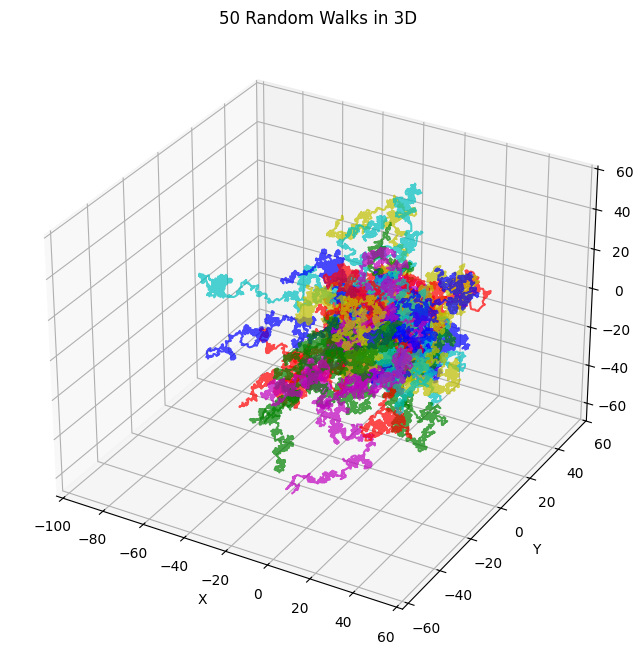

Average RMS Distance over all 3D walks: 26.83


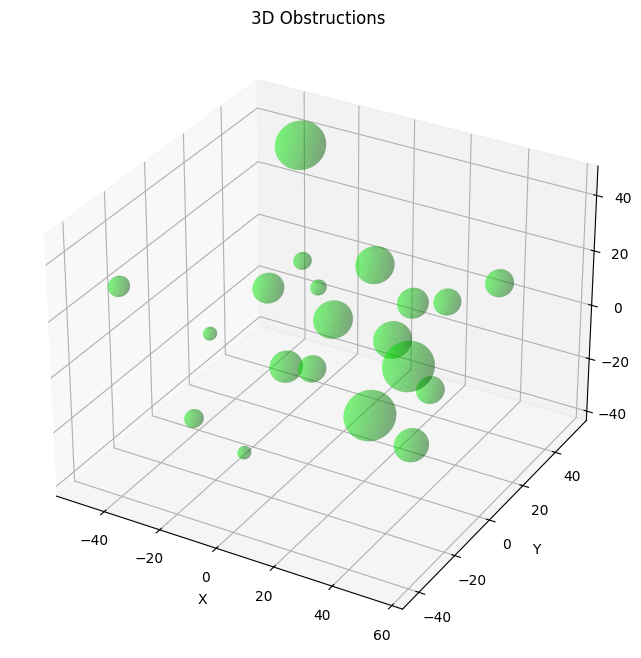

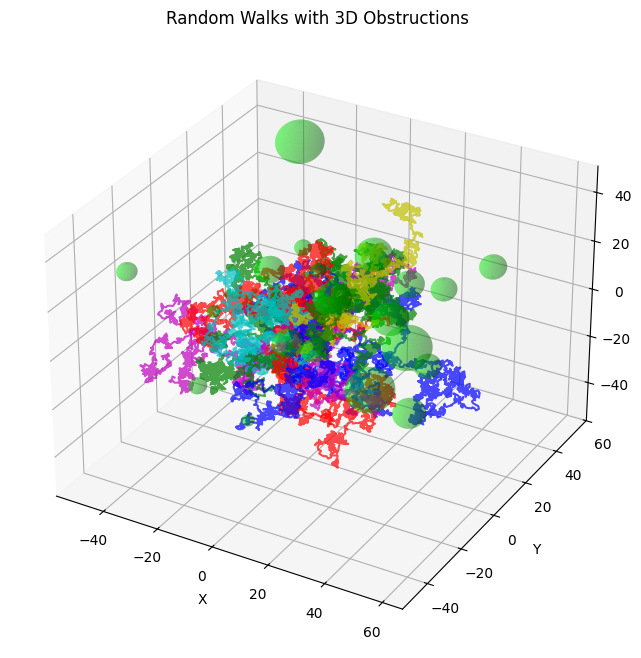

Average RMS Distance for 3D obstructed walks: 21.78


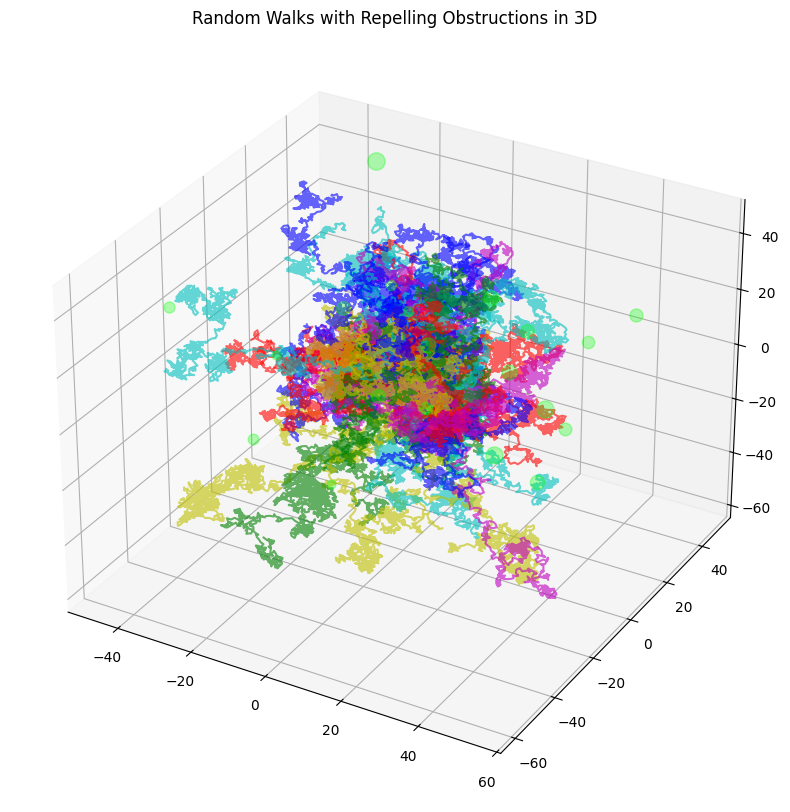

Average RMS Distance over all walks (3D): 25.31


In [37]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
num_walks = 50
num_steps = 1500
step_size = 1
colors = ['b', 'g', 'r', 'c', 'm', 'y']  # Six colors

# 1) Random Walk in 3D
def random_walk_3d(num_steps):
    """Generates a 3D random walk with equal step sizes."""
    x, y, z = np.zeros(num_steps), np.zeros(num_steps), np.zeros(num_steps)
    for i in range(1, num_steps):
        dx_prime = (random.random() - 0.5) * 2
        dy_prime = (random.random() - 0.5) * 2
        dz_prime = (random.random() - 0.5) * 2  # Adding z-axis
        L = np.sqrt(dx_prime**2 + dy_prime**2 + dz_prime**2)
        dx = (dx_prime / L) * step_size
        dy = (dy_prime / L) * step_size
        dz = (dz_prime / L) * step_size
        x[i] = x[i-1] + dx
        y[i] = y[i-1] + dy
        z[i] = z[i-1] + dz
    return x, y, z

# 2) Simulate and Plot 50 Random Walks in 3D
walks = []  # List to store each random walk's (x, y, z) data

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(num_walks):
    x, y, z = random_walk_3d(num_steps)
    walks.append((x, y, z))  # Store the walk in the list
    ax.plot(x, y, z, color=colors[i % len(colors)], alpha=0.7)

ax.set_title("50 Random Walks in 3D")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

# 3) Compute RMS distance in 3D
def rms_distance_3d(x, y, z):
    """Computes the RMS distance from the origin (0,0,0) for a 3D walk."""
    distances = np.sqrt(x**2 + y**2 + z**2)  # Compute the distance from the origin at each step
    rms_dist = np.sqrt(np.mean(distances**2))  # RMS of the distances
    return rms_dist

rms_distances = []  # List to store RMS distances for each walk

for x, y, z in walks:
    rms_dist = rms_distance_3d(x, y, z)
    rms_distances.append(rms_dist)

average_rms_free_3d = np.mean(rms_distances)
print(f"Average RMS Distance over all 3D walks: {average_rms_free_3d:.2f}")


######################################################################################
# 4) Introduce 3D obstructions
obstructions = []
num_obstructions = 20
space_limit = 50

for _ in range(num_obstructions):
    x_c, y_c, z_c = np.random.uniform(-space_limit, space_limit, 3)  # 3D center
    radius = np.random.uniform(2, 8)
    obstructions.append((x_c, y_c, z_c, radius))

def is_valid_step_3d(x, y, z):
    """ Verify if a step isn't between an obstruction in 3D."""
    for x_c, y_c, z_c, r in obstructions:
        if (x - x_c) ** 2 + (y - y_c) ** 2 + (z - z_c) ** 2 < r ** 2:
            return False
    return True

# Draw the obstructions in 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

for x_c, y_c, z_c, r in obstructions:
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = r * np.outer(np.cos(u), np.sin(v)) + x_c
    y = r * np.outer(np.sin(u), np.sin(v)) + y_c
    z = r * np.outer(np.ones(np.size(u)), np.cos(v)) + z_c
    ax.plot_surface(x, y, z, color='lime', alpha=0.3)

ax.set_title("3D Obstructions")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

# 5) Redo generation of 3D random walks with obstructions

def random_walk_3d_obstructed(num_steps):
    """Generates a 3D random walk with obstructions."""
    x, y, z = np.zeros(num_steps), np.zeros(num_steps), np.zeros(num_steps)
    for i in range(1, num_steps):
        dx_prime = (random.random() - 0.5) * 2
        dy_prime = (random.random() - 0.5) * 2
        dz_prime = (random.random() - 0.5) * 2
        L = np.sqrt(dx_prime**2 + dy_prime**2 + dz_prime**2)
        dx = (dx_prime / L) * step_size
        dy = (dy_prime / L) * step_size
        dz = (dz_prime / L) * step_size
        
        new_x, new_y, new_z = x[i-1] + dx, y[i-1] + dy, z[i-1] + dz
        
        if is_valid_step_3d(new_x, new_y, new_z):
            x[i], y[i], z[i] = new_x, new_y, new_z
        else:
            return x[:i], y[:i], z[:i]  # Stop walk when hitting obstruction
    return x, y, z

walks_obstructions = []

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

for x_c, y_c, z_c, r in obstructions:
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = r * np.outer(np.cos(u), np.sin(v)) + x_c
    y = r * np.outer(np.sin(u), np.sin(v)) + y_c
    z = r * np.outer(np.ones(np.size(u)), np.cos(v)) + z_c
    ax.plot_surface(x, y, z, color='lime', alpha=0.3)

for i in range(num_walks):
    x_walk, y_walk, z_walk = random_walk_3d_obstructed(num_steps)
    walks_obstructions.append((x_walk, y_walk, z_walk))
    ax.plot(x_walk, y_walk, z_walk, color=colors[i % len(colors)], alpha=0.7)

ax.set_title("Random Walks with 3D Obstructions")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

# 6) Compute RMS distance for obstructed 3D walks
rms_distances_obstructed = []
for x, y, z in walks_obstructions:
    rms_dist = rms_distance_3d(x, y, z)
    rms_distances_obstructed.append(rms_dist)

average_rms_obstructed_3d = np.mean(rms_distances_obstructed)
print(f"Average RMS Distance for 3D obstructed walks: {average_rms_obstructed:.2f}")

######################################################################################
# The process for repelling obstructions (steps 6 and 7) would follow similarly.

# Reflection logic for 3D obstructions
def reflect_step_3d(x, y, z, dx, dy, dz):
    """Reflect the step off a 3D obstruction."""
    for x_c, y_c, z_c, r in obstructions:
        if (x - x_c) ** 2 + (y - y_c) ** 2 + (z - z_c) ** 2 < r ** 2:
            # Reflection normal calculation
            normal_x, normal_y, normal_z = x - x_c, y - y_c, z - z_c
            norm = np.sqrt(normal_x**2 + normal_y**2 + normal_z**2)
            normal_x, normal_y, normal_z = normal_x / norm, normal_y / norm, normal_z / norm
            dot_product = dx * normal_x + dy * normal_y + dz * normal_z
            dx -= 2 * dot_product * normal_x
            dy -= 2 * dot_product * normal_y
            dz -= 2 * dot_product * normal_z
    return dx, dy, dz

def random_walk_3d_reflected(num_steps):
    """Generates a 3D random walk with repelling obstructions."""
    x, y, z = np.zeros(num_steps), np.zeros(num_steps), np.zeros(num_steps)  # Start at origin
    for i in range(1, num_steps):
        dx_prime = (random.random() - 0.5) * 2  # Random number between -1 and 1
        dy_prime = (random.random() - 0.5) * 2
        dz_prime = (random.random() - 0.5) * 2  # Random number for the z-direction
        L = np.sqrt(dx_prime**2 + dy_prime**2 + dz_prime**2)  # Normalize step size
        dx = (dx_prime / L) * step_size
        dy = (dy_prime / L) * step_size
        dz = (dz_prime / L) * step_size
        
        new_x, new_y, new_z = x[i-1] + dx, y[i-1] + dy, z[i-1] + dz
        
        # Reflect the step if it hits an obstruction
        dx, dy, dz = reflect_step_3d(new_x, new_y, new_z, dx, dy, dz)
        
        x[i], y[i], z[i] = x[i-1] + dx, y[i-1] + dy, z[i-1] + dz
    return x, y, z

# Store the values of each 3D walk for later calculations
walks_reflected_3d = []

# Plot 3D random walks
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot obstructions in 3D
for x_c, y_c, z_c, r in obstructions:
    ax.scatter(x_c, y_c, z_c, color='lime', s=r*20, alpha=0.3)

# Generate and plot walks
for i in range(num_walks):
    x_walk, y_walk, z_walk = random_walk_3d_reflected(num_steps)
    walks_reflected_3d.append((x_walk, y_walk, z_walk))  # Store the walk in the list
    ax.plot(x_walk, y_walk, z_walk, color=colors[i % len(colors)], alpha=0.6)

ax.set_title("Random Walks with Repelling Obstructions in 3D")
plt.show()

# RMS distance calculation for 3D reflected walks
def rms_distance_3d(x, y, z):
    """Computes the RMS distance from the origin (0,0,0) for a 3D walk."""
    distances = np.sqrt(x**2 + y**2 + z**2)  # Compute the distance from origin at each step
    rms_dist = np.sqrt(np.mean(distances**2))  # RMS of the distances
    return rms_dist

rms_distances_reflected_3d = []

# Loop through the stored walks and compute the RMS distance for each
for x, y, z in walks_reflected_3d:
    rms_dist = rms_distance_3d(x, y, z)
    rms_distances_reflected_3d.append(rms_dist)

# Compute the average RMS distance over all walks
average_rms_reflected_3d = np.mean(rms_distances_reflected_3d)
print(f"Average RMS Distance over all walks (3D): {average_rms_reflected_3d:.2f}")

In [38]:
# 8) Compute diffusion coefficient D for 3D walks
D_free_3d = average_rms_free_3d**2 / (2 * 3 * num_steps)
D_obstructed_3d = average_rms_obstructed_3d**2 / (2 * 3 * num_steps)
D_reflected_3d = average_rms_reflected_3d**2 / (2 * 3 * num_steps)

print(f"Diffusion Coefficients (3D): Free = {D_free_3d:.4f}, Obstructed = {D_obstructed_3d:.4f}, Repelling = {D_reflected_3d:.4f}")


Diffusion Coefficients (3D): Free = 0.0800, Obstructed = 0.0295, Repelling = 0.0712


## 4.3.4 Decay Implementation and Visualization

Write a program to simulate radioactive decay using the simple program in Listing 4.3 as a guide. You should obtain results similar to those in Figure 4.7.

1) Plot the logarithm of the number left, $\ln N(t)$, and the logarithm of the decay rate, $\ln \frac{\Delta N(t)}{\Delta t}$, versus time. Note that the simulation measures time in steps of $ \Delta t $ (generation number).

2) Check that you obtain what looks like exponential decay when you start with large values for $ N(0) $, but that the decay displays its stochastic nature for small $ N(0) $ (large $ N(0)$ values are also stochastic; they just don’t look it at first).

3) Create two plots, one showing that the slopes of $ N(t) $ versus time are independent of $ N(0) $, and another showing that the slopes are proportional to the value for $ \lambda $.

4) Create a plot showing that, within expected statistical variations, $ \ln N(t) $ and $ \ln \frac{\Delta N(t)}{\Delta t} $ are proportional.

5) Explain in your own words how a process that is spontaneous and random at its very heart can lead to exponential decay.

6) How does your simulation show that the decay is exponential-like and not a power law, such as $ N = \beta t^{-\alpha} $?


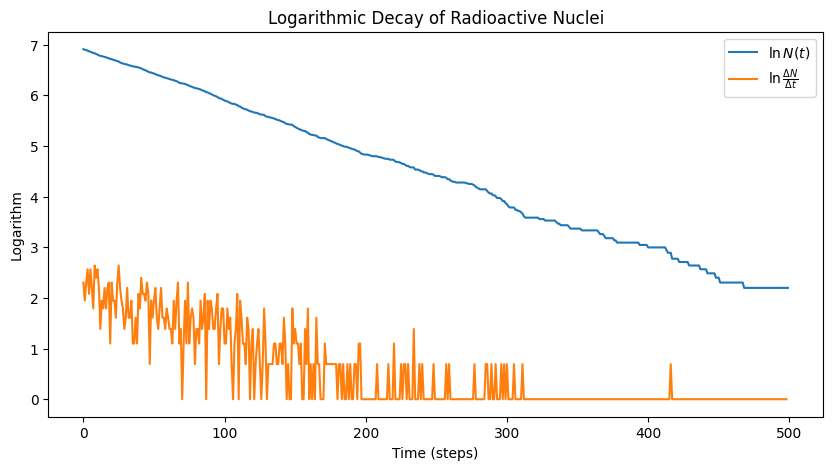

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the simulation function
def radioactive_decay(N0, lambda_, dt, steps):
    N = np.zeros(steps)
    N[0] = N0
    
    for t in range(1, steps):
        decayed = np.sum(np.random.rand(int(N[t-1])) < lambda_ * dt)
        N[t] = N[t-1] - decayed
        
        if N[t] < 0:
            N[t] = 0
            break
    
    return N

#Run the simulation
N0 = 1000  # Initial number of nuclei
lambda_ = 0.01  # Decay constant
dt = 1  # Time step
steps = 500  # Number of time steps

N = radioactive_decay(N0, lambda_, dt, steps)

time = np.arange(steps)
dN_dt = -np.diff(N) / dt  # Decay rate

#Plot ln(N) and ln(dN/dt) versus time
plt.figure(figsize=(10, 5))
plt.plot(time, np.log(N, where=N>0), label="$\\ln N(t)$")
plt.plot(time[:-1], np.log(dN_dt, where=dN_dt>0), label="$\\ln \\frac{\\Delta N}{\\Delta t}$")
plt.xlabel("Time (steps)")
plt.ylabel("Logarithm")
plt.legend()
plt.title("Logarithmic Decay of Radioactive Nuclei")
plt.show()

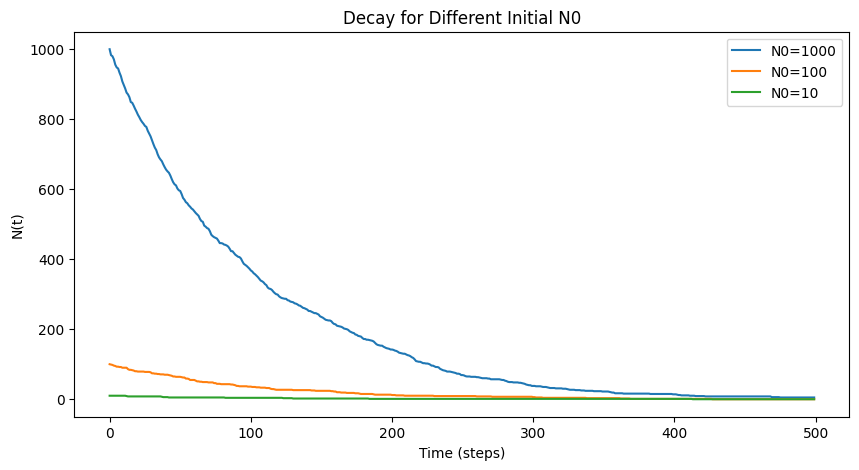

In [14]:
#Check behavior for large vs. small N0
plt.figure(figsize=(10, 5))
for N0 in [1000, 100, 10]:
    N = radioactive_decay(N0, lambda_, dt, steps)
    plt.plot(time, N, label=f"N0={N0}")
plt.xlabel("Time (steps)")
plt.ylabel("N(t)")
plt.legend()
plt.title("Decay for Different Initial N0")
plt.show()

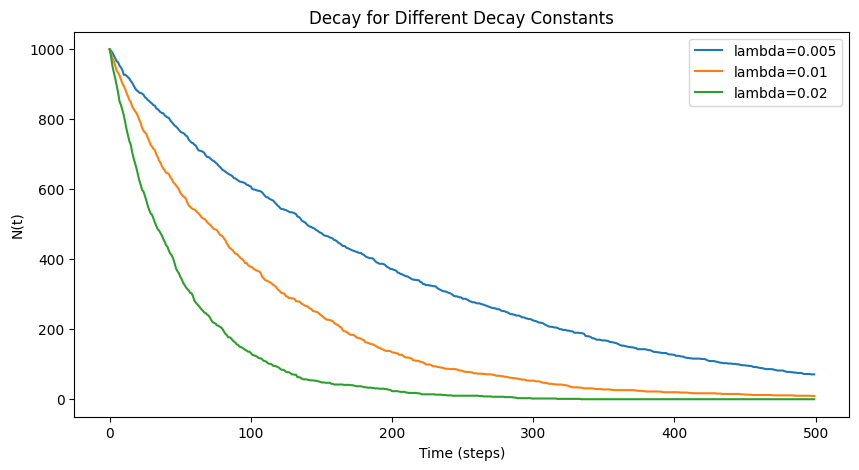

In [15]:
# Slopes vs. initial N0 and lambda
plt.figure(figsize=(10, 5))
lambdas = [0.005, 0.01, 0.02]
for lambda_ in lambdas:
    N = radioactive_decay(1000, lambda_, dt, steps)
    plt.plot(time, N, label=f"lambda={lambda_}")
plt.xlabel("Time (steps)")
plt.ylabel("N(t)")
plt.legend()
plt.title("Decay for Different Decay Constants")
plt.show()


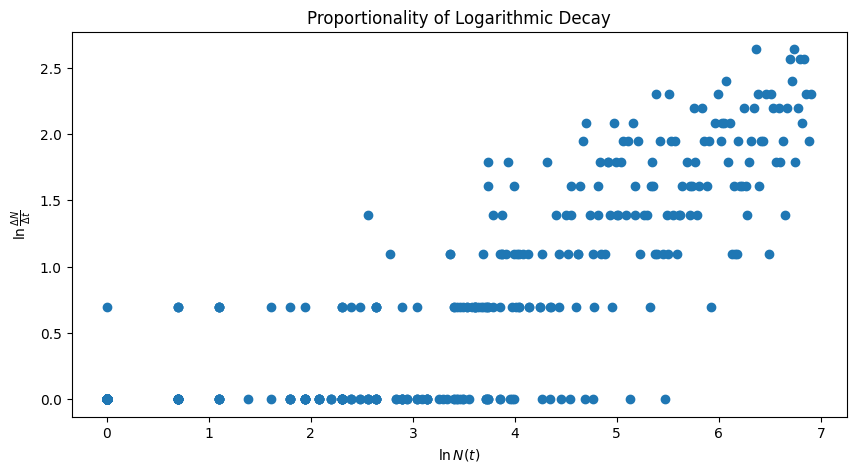

In [16]:
# Verify ln(N) and ln(dN/dt) proportionality
plt.figure(figsize=(10, 5))
plt.scatter(np.log(N[:-1], where=N[:-1]>0), np.log(dN_dt, where=dN_dt>0))
plt.xlabel("$\\ln N(t)$")
plt.ylabel("$\\ln \\frac{\\Delta N}{\\Delta t}$")
plt.title("Proportionality of Logarithmic Decay")
plt.show()

Radioactive decay is governed by probability at the level of individual nuclei, each decay event is random, the aggregation of many such events results in smooth exponential decay at a macroscopic scale. 

$lnN(t)$ versus time is approximately linear
proportional relationship between $lnN(t)$ and $ln(\frac{\Delta N}{\Delta t})$